In [1]:
import geopandas as gpd
import h5py
import importlib
import json
import lxml
import math
import matplotlib
import numpy as np
import os
import pandas as pd
import pyproj as proj
import rasterio
import requests
import seaborn as sns
import sys
import zipfile
import getpass
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from datetime import datetime
from pathlib import Path
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from sklearn.cluster import DBSCAN
#from sklearn import metrics

import ATL03_API as is2api
import Coral_Reef as coral_reef
import Depth_profile as depth
import ICESAT_plots as is2_plot
import IS2_file as is2File
import Pixel_transformation as pt
import Reef_plots as reef_plots
import Sentinel_API as sentinel
import Sentinel2_image as s2_img
import Tide_API as tide
import Water_level as water_level

import pylas
import scipy.spatial as spatial




In [2]:
photon_folder = '/Users/bonnieludka/Spaceship/IceSAT2/run_bathymetry/data/molokai/Output/Data_Cleaning/ICESAT_photons/'
photon_files = os.listdir(photon_folder)
# setup coordinate projections
crs_wgs = proj.Proj(init='epsg:4326') # assuming you're using WGS84 geographic
crs_bng = proj.Proj(init='epsg:3857') # use a locally appropriate projected CRS

/Users/bonnieludka/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/bonnieludka/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/Users/bonnieludka/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferre

<ipython-input-3-a014ecfb4aa2>:11: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  dfp['x'],dfp['y'] = proj.transform(crs_wgs, crs_bng, dfp.Longitude.values, dfp.Latitude.values)
<ipython-input-3-a014ecfb4aa2>:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['labels'] = labels
<ipython-input-3-a014ecfb4aa2>:212: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  dfbh['x'], dfbh['y'] = proj.transform(crs_wgs, crs_bng, dfbh.Longitude.values, dfbh.Latitude.values)
<ipython-input-3-a014ecfb4aa2>:212: SettingWithCopyWarning: 
A value is trying to be set on a

Estimated number of clusters: 1
Estimated number of noise points: 0
ssurf length:
164
ss length:
164
non_ss length:
0


<ipython-input-3-a014ecfb4aa2>:11: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  dfp['x'],dfp['y'] = proj.transform(crs_wgs, crs_bng, dfp.Longitude.values, dfp.Latitude.values)
<ipython-input-3-a014ecfb4aa2>:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['labels'] = labels
<ipython-input-3-a014ecfb4aa2>:212: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  dfbh['x'], dfbh['y'] = proj.transform(crs_wgs, crs_bng, dfbh.Longitude.values, dfbh.Latitude.values)
<ipython-input-3-a014ecfb4aa2>:212: SettingWithCopyWarning: 
A value is trying to be set on a

Estimated number of clusters: 1
Estimated number of noise points: 2
ssurf length:
112
ss length:
110
non_ss length:
2
Estimated number of clusters: 1
Estimated number of noise points: 2
ssurf length:
87
ss length:
85
non_ss length:
2


<ipython-input-3-a014ecfb4aa2>:89: RuntimeWarning: invalid value encountered in less
  id_outliers = (ss_maximum<ss_lo) | (ss_maximum>ss_hi) | (np.isnan(ss_maximum))
<ipython-input-3-a014ecfb4aa2>:89: RuntimeWarning: invalid value encountered in greater
  id_outliers = (ss_maximum<ss_lo) | (ss_maximum>ss_hi) | (np.isnan(ss_maximum))
<ipython-input-3-a014ecfb4aa2>:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['labels'] = labels
<ipython-input-3-a014ecfb4aa2>:212: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  dfbh['x'], dfbh['y'] = proj.transform(crs_wgs, crs_bng, dfbh.Longitude.values, dfbh.Latitude.values)
<ipython-input-3-a014ecfb4aa2>:212

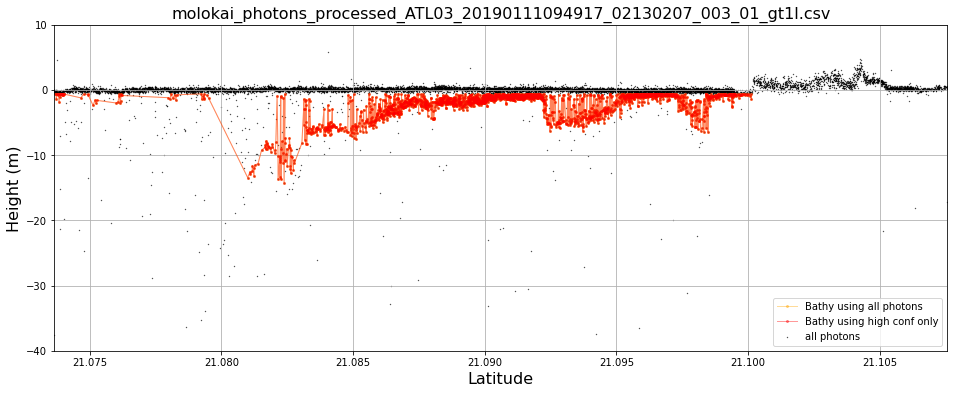

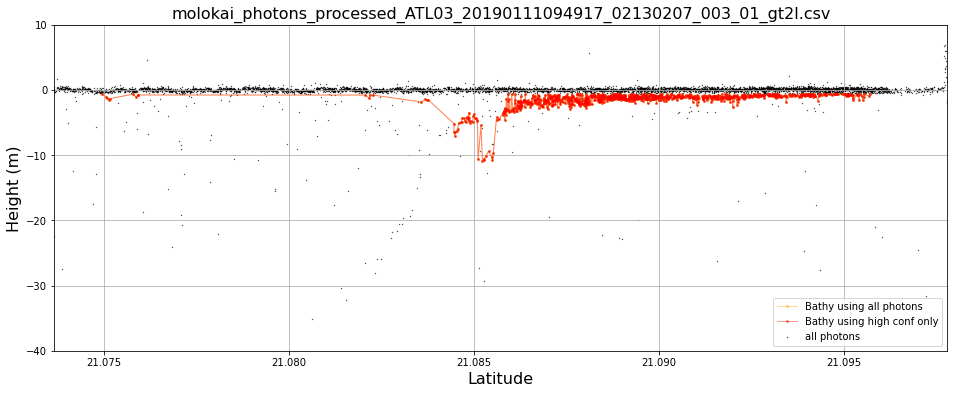

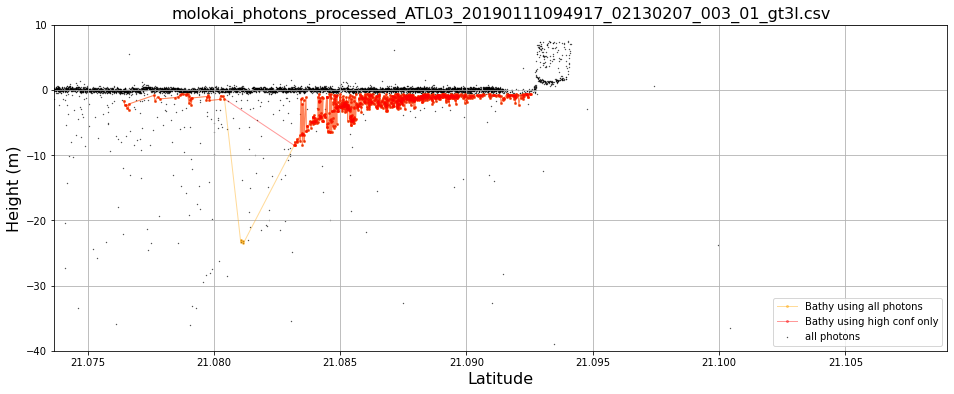

In [3]:
for pf in photon_files:
    #photons_path = '/Users/bonnieludka/Spaceship/IceSAT2/run_bathymetry/data/nasau/Output/Data_Cleaning/ICESAT_photons/nasau_photons_processed_ATL03_20190311081711_11130208_003_01_gt2l.csv'

    #data frame of photons
    #dfp = pd.read_csv(photons_path)
    dfp = pd.read_csv(os.path.join(photon_folder,pf))
    #print(dfp)
    if len(dfp) != 0: 
        
        # cast geographic coordinate pair to the projected metric coordinate reference system
        dfp['x'],dfp['y'] = proj.transform(crs_wgs, crs_bng, dfp.Longitude.values, dfp.Latitude.values) 
        # look at coordinates
        #plt.figure(figsize=(16,6))
        #plt.plot(dfb.x, dfb.y, marker='o', color = 'black')
        #plt.title('coordinates', fontsize=16)
        #plt.xlabel('x [m]', fontsize=16)
        #plt.ylabel('y [m]', fontsize=16) 
        
        # plot land, ocean, and inlandwater confidence
        # land confidence
# #         plt.figure(figsize=(16,6))
# #         land_conf_plt, = plt.plot(dfp.index.values, dfp.Conf_land, linestyle='', marker='^',color='red', \
# #                                   linewidth=1, markersize=10, label = 'Conf_land')
# #         #count_nan_land = dfp["Conf_land"].isna().sum()
# #         #print(count_nan_land)

# #         # ocean confidence
# #         #plt.figure(figsize=(16,6))
# #         ocean_conf_plt, = plt.plot(dfp.index.values, dfp.Conf_ocean, linestyle='', marker='o',color='blue', \
# #                                    linewidth=1, markersize=5, label = 'Conf_ocean')
# #         #plt.xlabel('Index #', fontsize=16)
# #         #plt.ylabel('Confidence', fontsize=16)
# #         #count_nan_ocean = dfp["Conf_ocean"].isna().sum()
# #         #print(count_nan_ocean)

# #         # inlandwater confidence
# #         #plt.figure(figsize=(16,6))
# #         inlandwater_conf_plt, = plt.plot(dfp.index.values, dfp.Conf_inlandwater, linestyle='', marker='s', \
# #                                          color='black', linewidth=1, markersize=2, label = 'Conf_inlandwater')
# #         #plt.xlabel('Index #', fontsize=16)
# #         #plt.ylabel('Confidence', fontsize=16)
# #         #count_nan_inlandwater = dfp["Conf_inlandwater"].isna().sum()
# #         #print(count_nan_inlandwater)
# #         plt.xlabel('Index #', fontsize=16)
# #         plt.ylabel('Confidence', fontsize=16)
# #         plt.grid(True)
# #         plt.legend(handles = [land_conf_plt, ocean_conf_plt, inlandwater_conf_plt], bbox_to_anchor=(0.5, 0., 0.5, 0.5))

#         # plot land depths vs. Lat where confidence is different size / color marker
#         plt.figure(figsize=(16,6))
#         sct_land = plt.scatter(dfp.Latitude, dfp.Height, s = (dfp.Conf_land+2)*5, c = dfp.Conf_land)
#         cbar = plt.colorbar(sct_land)
#         cbar.set_label('Land Confidence',fontsize=14)
#         plt.grid(True)
#         plt.xlabel('Latitude', fontsize=16)
#         plt.ylabel('Height (m)', fontsize=16)
#         plt.xlim(min(dfp.Latitude), max(dfp.Latitude))
#         plt.ylim(-40, 10)
#         plt.title(pf, fontsize=16)
#         # plot ocean depths vs. Lat where confidence is different size or color marker
#         plt.figure(figsize=(16,6))
#         sct_oc = plt.scatter(dfp.Latitude, dfp.Height, s = (dfp.Conf_ocean+2)*5, c = dfp.Conf_ocean)
#         cbar = plt.colorbar(sct_oc)
#         cbar.set_label('Ocean Confidence',fontsize=14)
#         plt.grid(True)
#         plt.xlabel('Latitude', fontsize=16)
#         plt.ylabel('Height (m)', fontsize=16)
#         plt.xlim(min(dfp.Latitude), max(dfp.Latitude))
#         plt.ylim(-40, 10)
#         plt.title(pf, fontsize=16)
        
        # try max method for finding sea surface 
        # only use high confidence ocean photons
        dfss = dfp.loc[(dfp.Conf_ocean == 4)]
        xbin_size = 1
        xbins = np.arange((min(round(dfss.x))-1),((max(round(dfss.x))+1)),xbin_size)
        xcenters = xbins[:-1]+.5
        ind = np.digitize(dfss.x, xbins)
        ss_maximum = np.array([dfss.raw_elev[ind == i].max() for i in range(1, len(xbins))]) 
        #subtract off bias and throw out outliers - is my outliers method working?
        ss_bias = 0.1
        ss_std = np.nanstd(ss_maximum)
        ss_mean = np.nanmean(ss_maximum)
        std_fac = 3
        ss_lo = ss_mean-std_fac*ss_std
        ss_hi = ss_mean+std_fac*ss_std
        ss_max = ss_maximum - ss_bias
        id_outliers = np.isnan(ss_maximum)
        id_outliers = (ss_maximum<ss_lo) | (ss_maximum>ss_hi) | (np.isnan(ss_maximum))
        #id_outliers = np.logical_or((ss_maximum<ss_lo), (ss_maximum>ss_hi), np.isnan(ss_maximum))
        #id_outliers = (ss_maximum<ss_lo) or (ss_maximum>ss_hi) or np.isnan(ss_maximum)
        #print('id_outliers')
        #print(sum(id_outliers))
        #help(DBSCAN)
        #ss_max[id_outliers] = np.nan
        # use dbscan to separate out sea surface?
        ssurf = ss_max[~id_outliers]
        xc = xcenters[~id_outliers]
        ssurf = ssurf.reshape(len(ssurf),1)
        xc = xc.reshape(len(xc),1)
        sx = np.hstack((ssurf, xc)) 
        eps_val = 3 #1 horizontal distance over which you are looking for a core sample of photons - choose carefully
        min_samp = 3 #5minimum number of photons to be considered a core sample - make bigger to reduce noise
        dbscan = DBSCAN(eps = eps_val, min_samples = min_samp)
        model = dbscan.fit(sx)
        labels = model.labels_
        #print(labels)
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        print('Estimated number of clusters: %d' % n_clusters_)
        print('Estimated number of noise points: %d' % n_noise_)
        print('ssurf length:')
        print(len(ssurf))
        xc_ss = xc[labels >= 0]
        ss = ssurf[labels >= 0]
        print('ss length:')
        print(len(ss))
        xc_non_ss = xc[labels < 0]
        non_ss = ssurf[labels < 0]
        print('non_ss length:')
        print(len(non_ss))

        # try median method for finding sea surface 
        # only use high confidence ocean photons
        #dfss = dfp.loc[(dfp.Conf_ocean == 4)]
        #throw out photons that stray by some standard deviation?
        #ss_std = dfss.raw_elev.std()
        #ss_mean = dfss.raw_elev.mean()
        #std_fac = 3
        #ss_lo = ss_mean-std_fac*ss_std
        #ss_hi = ss_mean+std_fac*ss_std
        #print(ss_lo)
        #print(ss_hi)
        #dfss = dfss.loc[(dfss.raw_elev>ss_lo) & (dfss.raw_elev<ss_hi)]
        #xbin_size = 20
        #xbins = np.arange((min(round(dfss.x))-1),((max(round(dfss.x))+1)),xbin_size)
        #ind = np.digitize(dfss.x, xbins)
        #ss_max = np.array([dfss.raw_elev[ind == i].median() for i in range(1, len(xbins))]) 
        
#         # plot sea surface
#         plt.figure(figsize=(16,6))
#         plt.plot(dfp.x, dfp.sea_surface, linestyle='-', marker='o',color='blue', linewidth=1, markersize=2,alpha = 0.4)
#         plt.plot(xcenters, ss_max, linestyle='-', marker='o', color = 'red',linewidth=1, markersize=2, alpha = 0.4, label = 'sea surface max')
#         plt.plot(xcenters[id_outliers], ss_max[id_outliers], linestyle='-', marker='o', color = 'green',linewidth=1, markersize=2, alpha = 0.4, label = 'outliers')
#         plt.plot(xc_ss, ss, linestyle='-', marker='o', color = 'orange',linewidth=1, markersize=2, alpha = 0.4, label = 'sea surface dbscan')
#         plt.plot(xc_non_ss, non_ss, linestyle='-', marker='o', color = 'yellow',linewidth=1, markersize=2, alpha = 0.4, label = 'outliers dbscan')
#         #plt.xlabel('Latitude', fontsize=16)
#         plt.xlabel('x (m)', fontsize=16)
#         plt.ylabel('Sea Surface Elevation (m)', fontsize=16)
#         #plt.xlim(min(dfb.Latitude), max(dfb.Latitude))
#         plt.grid(True)
#         plt.title(pf, fontsize=16)

#         # plot sea surface with data
#         plt.figure(figsize=(16,6))
#         plt.scatter(dfp.x, dfp.raw_elev, s = 0.1, color = 'black', label = 'all photons')
#         plt.plot(dfp.x, dfp.sea_surface, linestyle='-', marker='o',color='blue', linewidth=1, markersize=2,alpha = 0.4, label = 'sea surface')
#         plt.plot(xcenters, ss_max, linestyle='-', marker='o', color = 'red',linewidth=1, markersize=2, alpha = 0.4, label = 'sea surface max')
#         plt.plot(xcenters[id_outliers], ss_max[id_outliers], linestyle='-', marker='o', color = 'green',linewidth=1, markersize=2, alpha = 0.4, label = 'outliers')
#         plt.plot(xc_ss, ss, linestyle='-', marker='o', color = 'orange',linewidth=1, markersize=2, alpha = 0.4, label = 'sea surface dbscan')
#         plt.plot(xc_non_ss, non_ss, linestyle='-', marker='o', color = 'yellow',linewidth=1, markersize=2, alpha = 0.4, label = 'outliers dbscan')
#         #plt.xlabel('Latitude', fontsize=16)
#         plt.xlabel('x (m)', fontsize=16)
#         plt.ylabel('Raw Elevation (m)', fontsize=16)
#         #plt.xlim(min(dfb.Latitude), max(dfb.Latitude))
#         plt.grid(True)
#         plt.title(pf, fontsize=16)
#         plt.legend(loc='lower right')

#         # plot sea surface with data and zoom in on surface
#         plt.figure(figsize=(16,6))
#         plt.scatter(dfp.x, dfp.raw_elev, s = 0.1, color = 'black', label = 'all photons')
#         plt.plot(dfp.x, dfp.sea_surface, linestyle='-', marker='o',color='blue', linewidth=1, markersize=2,alpha = 0.4, label = 'sea surface')
#         plt.plot(xcenters, ss_max, linestyle='-', marker='o', color = 'red',linewidth=1, markersize=2, alpha = 0.4, label = 'sea surface max')
#         plt.plot(xcenters[id_outliers], ss_max[id_outliers], linestyle='-', marker='o', color = 'green',linewidth=1, markersize=2, alpha = 0.4, label = 'outliers')
#         plt.plot(xc_ss, ss, linestyle='-', marker='o', color = 'orange',linewidth=1, markersize=2, alpha = 0.4, label = 'sea surface dbscan')
#         plt.plot(xc_non_ss, non_ss, linestyle='-', marker='o', color = 'yellow',linewidth=1, markersize=2, alpha = 0.4, label = 'outliers dbscan')
#         #plt.xlabel('Latitude', fontsize=16)
#         plt.xlabel('x (m)', fontsize=16)
#         plt.ylabel('Raw Elevation (m)', fontsize=16)
#         #plt.xlim(min(dfb.Latitude), max(dfb.Latitude))
#         plt.ylim(np.median(dfp.sea_surface)-2, np.median(dfp.sea_surface)+2)
#         plt.grid(True)
#         plt.title(pf, fontsize=16)
#         plt.legend(loc='lower right')
                       
        # data frame of potential bathy photons - ignoring deep and near surface photons
        water_thresh_high = -0.6
        water_thresh_low = -50
        dfb = dfp.loc[(dfp.Height > water_thresh_low) & (dfp.Height < water_thresh_high)]
        # use dbscan to extract the bathy: https://scikit-learn.org/stable/modules/clustering.html#dbscan
        eps_val = .75 #1 #1 horizontal distance over which you are looking for a core sample of photons - choose carefully
        min_samp = 4 #6 #5minimum number of photons to be considered a core sample - make bigger to reduce noise
        hx = dfb[['Height','x']]
        #print(hx)
        #print(type(hx))
        dbscan = DBSCAN(eps = eps_val, min_samples = min_samp)
        model = dbscan.fit(hx)
        labels = model.labels_
        dfb['labels'] = labels
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        #print('Estimated number of clusters: %d' % n_clusters_)
        #print('Estimated number of noise points: %d' % n_noise_)
        bathy = dfb.loc[dfb.labels >= 0]
        non_bathy = dfb.loc[dfb.labels < 0]
        
        # do the same thing, but only use high confidence photons
        dfbh = dfb.loc[(dfb.Conf_ocean == 4) | (dfb.Conf_land == 4)]
        dfbh['x'], dfbh['y'] = proj.transform(crs_wgs, crs_bng, dfbh.Longitude.values, dfbh.Latitude.values)
        hx = dfbh[['Height','x']]
        # implement dbscan 
        eps_val = .75 #1 #1 horizontal distance over which you are looking for a core sample of photons - choose carefully
        min_samp = 4 #6 #5minimum number of photons to be considered a core sample - make bigger to reduce noise
        dbscan = DBSCAN(eps = eps_val, min_samples = min_samp)
        model = dbscan.fit(hx)
        labels = model.labels_
        dfbh['labels'] = labels
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        #print('Estimated number of clusters: %d' % n_clusters_)
        #print('Estimated number of noise points: %d' % n_noise_)
        bathy_h = dfbh.loc[dfbh.labels >= 0]
        non_bathy_h = dfbh.loc[dfbh.labels < 0]

        # Plot photons and bathy 
        plt.figure(figsize=(16,6))
        # plot photons
        photons_plt = plt.scatter(dfp.Latitude, dfp.Height, s = 0.1, color = 'black', label = 'all photons')
        # plot bathy
        bathy_plt = plt.plot(bathy.Latitude, bathy.Height, linestyle='-', marker='o',color='orange', linewidth=1, markersize=2,alpha = 0.4, label = 'Bathy using all photons')
        bathy_h_plt = plt.plot(bathy_h.Latitude, bathy_h.Height, linestyle='-', marker='o',color='red', linewidth=1, markersize=2,alpha = 0.4, label = 'Bathy using high conf only')
        plt.xlabel('Latitude', fontsize=16)
        plt.ylabel('Height (m)', fontsize=16)
        plt.xlim(min(dfb.Latitude), max(dfb.Latitude))
        plt.ylim(-40, 10)
        plt.grid(True)
        plt.title(pf, fontsize=16)
        #plt.legend(handles = [photons_plt, bathy_plt, bathy_h_plt])#, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
        plt.legend(loc='lower right')
        
        
        
        


In [4]:
#overlay ground truth data

# #loop through .las data and find points near IS2 data
# las = pylas.read("/Users/bonnieludka/Spaceship/groundtruth/molokai/Job592342_hi2013_usace_ncmp_molokai/Job592342_21157_09_12.las")

# lsp = las.points
# print(lsp)
# print(las.header.version)
# las = pylas.convert(las, point_format_id=6)
# #print(lsp)
# #las.header.point_format.id
# #las = pylas.convert(las, point_format_id=10, file_version='1.4')
# #print(lsp)

# #with pylas.open("/Users/bonnieludka/Spaceship/groundtruth/molokai/Job592342_hi2013_usace_ncmp_molokai/Job592342_21157_09_12.las") as f:
# #    for points in f.chunk_iterator(1_000_000):
# #        print(points)

ncols=9722
nrows=2998
xllcorner=-157.174343000000
yllcorner=21.078313000000
cellsize=0.000009000000
NODATA_value=-9999

zmflipped = np.loadtxt("/Users/bonnieludka/Spaceship/groundtruth/molokai/Job592580_hi2013_usace_ncmp_molokai/Job592580_hi2013_usace_ncmp_molokai.asc")#, skiprows=6)
zm = np.flipud(zmflipped)

In [5]:
print(zm)

[[-9999.         -9999.         -9999.         ... -9999.
  -9999.         -9999.        ]
 [-9999.         -9999.         -9999.         ... -9999.
  -9999.         -9999.        ]
 [-9999.         -9999.         -9999.         ... -9999.
  -9999.         -9999.        ]
 ...
 [-9999.         -9999.         -9999.         ... -9999.
  -9999.         -9999.        ]
 [-9999.         -9999.         -9999.         ...    18.05999947
  -9999.         -9999.        ]
 [-9999.         -9999.         -9999.         ...    18.02000046
  -9999.         -9999.        ]]


In [6]:
print(zm.shape)

NX    = ncols-1;
NY    = nrows-1;
lon1  = xllcorner;
lat1  = yllcorner;
delta = cellsize;    

#Create longitude and latitude coords:
lonc   = np.arange(lon1,delta*NX+lon1,delta)
latc   = np.arange(lat1,delta*NY+lat1,delta)
print(lonc.shape)
print(latc.shape)

#some of the z matrix might have been cut off because lat coordinate seems too long for it?
#chop lat coord for now
# latshort = latc[0:2992]
# print(latshort.shape)

#create lat and lon matrix that matches z elevation matrix
lonm, latm = np.meshgrid(lonc, latc, sparse=False, indexing='xy')
print(lonm.shape)
print(latm.shape)

#unravel matrices into vectors
zvr = np.ravel(zm)
lonvr = np.ravel(lonm)
latvr = np.ravel(latm)
print(zvr.shape)
print(lonvr.shape)
print(latvr.shape)

(2998, 9722)
(9722,)
(2998,)
(2998, 9722)
(2998, 9722)
(29146556,)
(29146556,)
(29146556,)


In [7]:
#remove bad data
zv = np.delete(zvr, np.where(zvr == -9999.))
lonv = np.delete(lonvr, np.where(zvr == -9999.))
latv = np.delete(latvr, np.where(zvr == -9999.))

print(zv)

[-20.03000069 -19.95999908 -20.12000084 ...  18.05999947  18.07999992
  18.02000046]


In [8]:
#plot the data
#gt_scat = plt.scatter(lonv, latv, s = 2, c = zv)
#cbar = plt.colorbar(gt_scat)
#is_scat = plt.scatter(bathy.Longitude, bathy.Latitude, s = 2, c = bathy.Height)

In [9]:
import utm
from salem import GoogleVisibleMap
def to_utm(lat, lon):
    if len(np.shape(lat)) == 0:
        x, y, z1, z2 = utm.from_latlon(lat, lon)
        return x, y
    else:
        x, y, z1, z2 = np.array([utm.from_latlon(la, lo) for la, lo in zip(lat,lon)]).T
        return np.array(x, dtype=float), np.array(y, dtype=float)

def get_google_map(lat_dat, lon_dat, maptype='satellite'):
    """
    Give lat/lon data and get a map image and UTM coordinate extent which 
    contains those data. To plot, call plt.imshow(img, extent=extent) 
    maptypes can be  'roadmap', 'satellite', 'hybrid', or 'terrain'
    @returns img, extent
        img - image data (MxNx3)
        extent - 4 element array as [min_easting, max_easting, min_westing, max_westing]
    """
    # Plug in coordinate extent
    g = GoogleVisibleMap(x=[np.min(lon_dat), np.max(lon_dat)],
                         y=[np.min(lat_dat), np.max(lat_dat)],
                         scale=2, maptype=maptype) 
    # Retrieve output extent
    min_lon, max_lon, min_lat, max_lat = g.grid.extent_in_crs()
    # Transform into UTM
    min_x, min_y = to_utm(min_lat, min_lon)
    max_x, max_y = to_utm(max_lat, max_lon)
    # Return image and extent
    return g.get_vardata(), [min_x, max_x, min_y, max_y]

In [10]:
#decimate data and convert to UTM
lats = latv[::100]
lons = lonv[::100]
print(latv.shape)
print(lats.shape)
xgt_utm, ygt_utm = to_utm(lats, lons)
zs = zv[::100]

(15170870,)
(151709,)


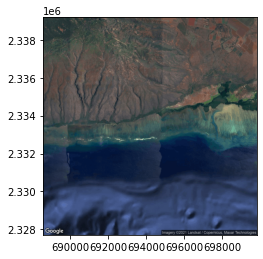

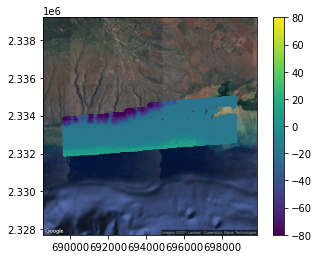

In [11]:
img, extent = get_google_map([np.nanmin(lats), np.nanmax(lats)], 
                         [np.nanmin(lons), np.nanmax(lons)])

plt.figure()
plt.imshow(img, extent=extent)


plt.figure()
plt.imshow(img, extent=extent)
gt_scat = plt.scatter(xgt_utm, ygt_utm, s = 2, c = -zs, vmin=-80, vmax=80)
cbar = plt.colorbar(gt_scat)


In [12]:
#convert to metric units
crs_wgs84 = proj.CRS('EPSG:4326') # assuming you're using WGS84 geographic
crs_local = proj.CRS('EPSG:3857') # use a locally appropriate projected CRS
transformer = proj.Transformer.from_crs(crs_wgs84, crs_local)
transformer_rev = proj.Transformer.from_crs(crs_local,crs_wgs84)
xv, yv = transformer.transform(latv, lonv)

In [13]:
#convert IS2 bathy to metric units
islon = bathy['Longitude'].to_numpy()
islat = bathy['Latitude'].to_numpy()
isx, isy = transformer.transform(islat, islon)


In [14]:
# #plot in metric units
# gt_scat_xy = plt.scatter(xv, yv, s = 2, c = zv)
# cbar = plt.colorbar(gt_scat_xy)
# #is_scat_xy = plt.scatter(isx, isy, s = 2, c = bathy.Height)

In [15]:
# find median value of ground truth points near each IS2 point
gt_points = np.vstack((xv,yv)).T
gt_point_tree = spatial.cKDTree(gt_points)
is_points = np.vstack((isx, isy)).T

#is this the best way to pre-allocate an array?
gt_med = np.zeros((len(isx),))

# bleh = gt_point_tree.query_ball_point(is_points[0], 1)
# print(bleh)
# blah = zv[bleh]
# print(blah)
# gt_med = np.median(blah)
# print(gt_med)
for isp in range(len(is_points)):
    bleh = gt_point_tree.query_ball_point(is_points[isp], 1)
    blah = zv[bleh]
    gt_med[isp] = np.median(blah)

#print(gt_med)



/Users/bonnieludka/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bonnieludka/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
#gt_lat, gt_lon = transformer_rev.transform(gt_med[:,0], gt_med[:,1])
#print(gt_lat)
#print(gt_lon)

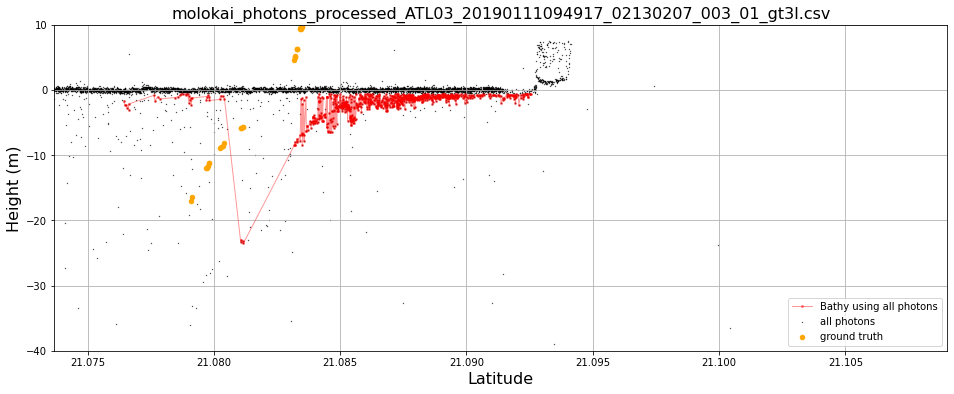

In [19]:
#plot ground truth and IS2 data
plt.figure(figsize=(16,6))
# plot photons
photons_plt = plt.scatter(dfp.Latitude, dfp.Height, s = 0.1, color = 'black', label = 'all photons')
#plot grouth truth
gt_plt = plt.scatter(bathy.Latitude, gt_med, s = 20, color = 'orange', label = 'ground truth')
# plot bathy
bathy_plt = plt.plot(bathy.Latitude, bathy.Height, linestyle='-', marker='o',color='red', linewidth=1, markersize=2,alpha = 0.4, label = 'Bathy using all photons')
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Height (m)', fontsize=16)
plt.xlim(min(dfb.Latitude), max(dfb.Latitude))
plt.ylim(-40, 10)
plt.grid(True)
plt.title(pf, fontsize=16)
#plt.legend(handles = [photons_plt, bathy_plt, bathy_h_plt])#, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(loc='lower right')

In [18]:
points = np.array([(1, 2), (3, 4), (4, 5)])
print(points)
point_tree = spatial.cKDTree(points)
# This finds the index of all points within distance 1 of [1.5,2.5].
print(point_tree.query_ball_point([1.5, 2.5], 1))
# [0]

# This gives the point in the KDTree which is within 1 unit of [1.5, 2.5]
print(point_tree.data[point_tree.query_ball_point([1.5, 2.5], 1)])
# [[1 2]]

# More than one point is within 3 units of [1.5, 1.6].
print(point_tree.data[point_tree.query_ball_point([1.5, 1.6], 3)])
# [[1 2]
#  [3 4]]


    

[[1 2]
 [3 4]
 [4 5]]
[0]
[[1. 2.]]
[[1. 2.]
 [3. 4.]]
